In [1]:
# coding: utf-8

# Hands-On Machine Learning with Scikit-Learn & TensorFlow
# Chapter 2: End-to-End Machine Learning Project
# Housing

import os
import tarfile
import hashlib
import pandas as pd
import numpy as np

from six.moves import urllib

def fetch_data():
    DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
    HOUSING_PATH = "datasets/housing"
    HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

    housing_url = HOUSING_URL
    housing_path = HOUSING_PATH

    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    csv_path = os.path.join(housing_path,"housing.csv")

    if not os.path.exists(csv_path):
        tgz_path = os.path.join(housing_path,"housing.tgz")
        urllib.request.urlretrieve(housing_url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()

    return pd.read_csv(csv_path)


In [2]:
housing = fetch_data()
print(len(housing))
housing.info()

20640
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
print(housing.columns)
print(housing['ocean_proximity'].value_counts())

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


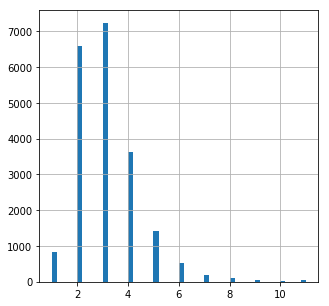

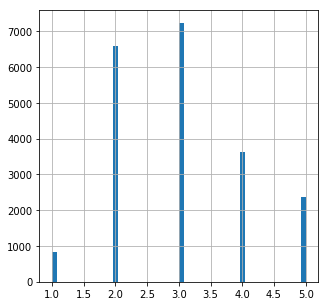

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
#
# 分层抽样: 将抽样单位按某种特征或某种规则划分为不同的层，
# 然后从不同的层中独立、随机地抽取样本。从而保证样本的结
# 构与总体的结构比较相近，从而提高估计的精度。
#
# 观察数据根据income分层
#

housing = fetch_data()

housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].hist(bins=50, figsize=(5,5))
plt.show()
housing['income_cat'].where(housing['income_cat'] < 5, other=5.0, inplace=True)
housing['income_cat'].hist(bins=50, figsize=(5,5))
plt.show()
housing['income_cat'].value_counts()/len(housing)

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

strat_train_set, strat_test_set = None, None
for train_idx, test_idx in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]
print(len(strat_train_set))
print(len(strat_test_set))

strat_train_set.drop(['income_cat'], axis=1, inplace=True)
strat_test_set.drop(['income_cat'], axis=1, inplace=True)
print(strat_test_set.info())

16512
4128
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 10 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4079 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(9), object(1)
memory usage: 354.8+ KB
None


In [8]:
housing = strat_train_set.drop('median_house_value',axis=1)
print (len(housing))
housing_labels = strat_train_set['median_house_value'].copy()
print(housing_labels[0:5])
strat_train_set.head()

16512
17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelBinarizer

from sklearn.pipeline import FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        return x[self.attribute_names].values

class MyAttribsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.rooms_idx, self.bedrooms_idx, self.household_idx, self.population_idx = 3,4,6,5
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,x, y=None):
        return self
    def transform(self,x,y=None):
        room_per_household = x[:,self.rooms_idx]/x[:,self.household_idx]
        population_per_household = x[:,self.population_idx]/x[:,self.household_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = x[:,self.bedrooms_idx]/x[:,self.rooms_idx]
            return np.c_[x,room_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[x,room_per_household, population_per_household]    

class LabelBinarizerPipelineFriendly(LabelBinarizer):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelBinarizerPipelineFriendly, self).fit(X)
    def transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).transform(X)
    def fit_transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)

class CustomBinarizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None,**fit_params):
        return self
    def transform(self, X):
        return LabelBinarizer().fit(X).transform(X)
    
# 数值类attributes
cat_attributes = ['ocean_proximity']
housing_num = housing.drop(cat_attributes,axis=1)
num_attributes = list(housing_num)
# 分类型attributes

# 一般数值类属性预处理pipeline
num_pipeline = Pipeline([
    # 数据选择
    ('selector', DataFrameSelector(num_attributes)),
    # 缺失值处理：中值补齐
    ('imputer', Imputer(strategy='median')),
    # 属性合并转换
    ('attribs_transformer', MyAttribsTransformer(True)),
    # 标准化：标准差标准化
    ('scaler', StandardScaler())
])

# 分类属性预处理pipeline
cat_pipeline = Pipeline([
    # 数据选择
    ('selector', DataFrameSelector(cat_attributes)),
    # 二值化：独热编码
    ('label_binarizer', LabelBinarizerPipelineFriendly())
])

# pipeline集合
full_pipelines = FeatureUnion([
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline)
])


In [10]:
housing_prepared = full_pipelines.fit_transform(housing)
print(housing_prepared.shape)
print(housing_prepared[:2])

debug:fit_transform len(x)=16512
(16512, 16)
[[-1.15604281  0.77194962  0.74333089 -0.49323393 -0.44543821 -0.63621141
  -0.42069842 -0.61493744 -0.31205452 -0.08649871  0.15531753  1.
   0.          0.          0.          0.        ]
 [-1.17602483  0.6596948  -1.1653172  -0.90896655 -1.0369278  -0.99833135
  -1.02222705  1.33645936  0.21768338 -0.03353391 -0.83628902  1.
   0.          0.          0.          0.        ]]


### LinearRegression

In [60]:
def predict(model, dataset, labels):
    # mse
    predictions = model.predict(dataset)
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    print(rmse)

housing_test = strat_test_set.drop("median_house_value", axis=1)
housing_test_prepared = full_pipelines.fit_transform(housing_test)
housing_test_labels = strat_test_set['median_house_value'].copy()

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_reg = LinearRegression()
linear_reg.fit(housing_prepared, housing_labels)

predict(linear_reg, housing_prepared, housing_labels)
predict(linear_reg, housing_test_prepared, housing_test_labels)

68628.32198090691
66974.21305353654


       median_house_value
count         4128.000000
mean        206315.401647
std         114170.048854
min          14999.000000
25%         118975.000000
50%         181300.000000
75%         269025.000000
max         500001.000000


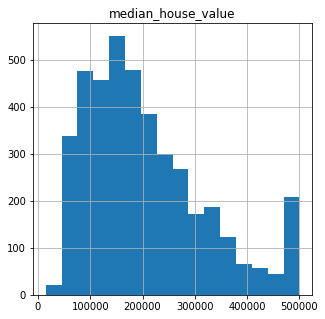

In [43]:
attributes = ['median_house_value']
print(strat_test_set[attributes].describe())

strat_test_set[attributes].hist(bins=16, figsize=(5,5))
plt.show()

In [44]:
print(66974/206315)

0.3246201197198459


预测的值偏差较大，测试集上的均方根误差高达66974，属于典型的欠拟合。

### DecisionTreeRegressor()

In [63]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

predict(tree_reg, housing_prepared, housing_labels)
predict(tree_reg, housing_test_prepared, housing_test_labels)

0.0
110740.85146261724


训练集上均方差为0,测试集上均方差高达109646。属于过拟合情况。

### Cross-Validation


In [72]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("scores:",scores)
    print("mean:",scores.mean())
    print("mean std:",scores.std())

def display_cv_score(model, dataset, labels):
    scores = cross_val_score(model, dataset, labels,scoring="neg_mean_squared_error",cv=10)
    rmse_scores = np.sqrt(-scores)
    display_scores(rmse_scores)

In [73]:
display_cv_score(tree_reg, housing_prepared, housing_labels)

scores: [69490.86717591 68521.23760347 70249.64424001 69528.67858494
 70653.69812799 75379.50726403 70125.83604638 70741.693813
 76383.8468669  69639.61959175]
mean: 71071.46293143585
mean std: 2491.301494683414


In [74]:
display_cv_score(linear_reg, housing_prepared, housing_labels)

scores: [66741.34802706 66954.28467476 70347.95244419 74752.61517811
 68030.34776633 71209.64167322 64983.78603837 68277.12200781
 71553.25720988 67665.01799113]
mean: 69051.53730108745
mean std: 2737.627156339376


决策树模型的过拟合导致其10-fold交叉验证结果比线性回归结果还差

### RandomForestRegressor

In [76]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
predict(forest_reg, housing_prepared, housing_labels)
display_cv_score(forest_reg, housing_prepared, housing_labels)

22383.989950081323
scores: [52257.34310725 50465.46492306 52191.15162746 55182.55532967
 52135.59698856 55528.77660089 52516.69212013 50440.30040157
 54622.36341752 51206.70266416]
mean: 52654.69471802878
mean std: 1760.0103406904227


比较之下：

|model| cv score|train set score|
|--|--|--|
| linear regression | 69051 | 68628|
| decision tree regression| 71071|0|
| random forest| 52825|22474|

- 随机森林模型的结果最好但仍然存在过拟合问题（交叉验证分数和训练集上的分数52825/22474相差2倍多）。
- 线性回归拟合程度最好（交叉验证和训练集上的分数接近）。
- 决策树过拟合最严重（交叉验证和训练集上的分数相差非常大，训练集上分数为0）。

** 问题： 如何模型减小过拟合程度？**
- 简化模型？
- 特征筛选
- 更多数据
- 调参？
